In [845]:
!pip install lightgbm

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm 
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [846]:
data=pd.read_csv('train.csv')
data=data.drop('id',axis=1)
#data=data.drop('CustomerId',axis=1)
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [847]:
data.shape

(165034, 13)

In [848]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 16.4+ MB


In [849]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [850]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [851]:
le=LabelEncoder()
data.Surname=pd.DataFrame((le.fit_transform(data.Surname)))
data.Surname=(data.Surname)/100
data.Surname.describe()

count    165034.000000
mean         15.472819
std           7.727712
min           0.000000
25%           9.240000
50%          15.890000
75%          21.860000
max          27.960000
Name: Surname, dtype: float64

In [852]:
data.shape

(165034, 13)

In [919]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [920]:
X

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15674932,19.24,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,15749177,19.25,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,15694510,11.78,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,15741417,12.99,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,15766172,4.67,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,17.01,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75
165030,15665521,19.18,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45
165031,15664752,11.72,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56
165032,15689614,11.76,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03


In [921]:
def mifc(train_data,test_data):
    mif=mutual_info_classif(train_data.select_dtypes(include=['int64','float64']),test_data)
    cols=(train_data.select_dtypes(include=['int64','float64'])).columns
    mifdf=pd.DataFrame()
    mifdf['Columns']=cols
    mifdf['Score']=mif
    mifdf=mifdf.sort_values(by='Score',ascending=False)
    plt.figure(figsize=(5,7))
    sns.barplot(mifdf,x=mifdf.Score,y=mifdf.Columns)
    plt.show()

In [922]:
#mifc(X,y)

In [923]:
def encode_cat(train_data):
    cat_cols=train_data.select_dtypes(include=['object'])
    cat_cols_list=cat_cols.columns
    new_cat_cols=pd.get_dummies(cat_cols,dtype='int64',drop_first=True)
    train_data=pd.concat([train_data,new_cat_cols],axis=1)
    train_data=train_data.drop(cat_cols_list,axis=1)
    return train_data

In [924]:
X=encode_cat(X)
X

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,15674932,19.24,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,1
1,15749177,19.25,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,1
2,15694510,11.78,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,1
3,15741417,12.99,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,1
4,15766172,4.67,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,17.01,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,1,0
165030,15665521,19.18,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,0,1
165031,15664752,11.72,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,0,1
165032,15689614,11.76,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,1,0


# Splitting Dataset

In [925]:
X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=42,shuffle=True,test_size=0.2)
X_train

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
149380,15780088,27.58,679,41.0,9,0.00,2,1.0,1.0,103560.98,0,0,1
164766,15679760,23.50,721,46.0,9,115764.32,2,1.0,0.0,102950.79,0,0,1
155569,15637678,15.42,551,35.0,5,0.00,1,1.0,0.0,155394.52,0,0,1
124304,15728693,9.08,743,31.0,3,57866.03,2,1.0,1.0,107428.42,0,1,0
108008,15613673,15.37,675,28.0,2,0.00,2,1.0,0.0,134110.93,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,15730673,12.99,668,45.0,6,104576.80,1,1.0,0.0,113081.42,1,0,1
103694,15731166,12.99,751,43.0,7,0.00,2,1.0,0.0,88866.39,0,0,1
131932,15573741,24.49,753,39.0,7,0.00,2,1.0,0.0,167973.63,0,0,0
146867,15754574,2.05,685,48.0,4,0.00,2,1.0,1.0,24998.75,0,0,0


# Models

In [926]:
def XGBC(train_data,train_set,test_data,test_set): 
    xgb=XGBClassifier()
    model=xgb.fit(train_data,train_set)
    pred=model.predict(test_data)
    print(accuracy_score(test_set,pred))
    
    
    

In [927]:
XGBC(X_train,y_train,X_test,y_test)


0.866694943496834


In [928]:
def LGBM(train_data,train_set,test_data,test_set): 
    lgbm=LGBMClassifier()
    model=lgbm.fit(train_data,train_set)
    pred=model.predict(test_data)
    print(accuracy_score(test_set,pred))
    print(roc_auc_score(test_set,model.predict_proba(test_data)[:,1]))

In [929]:
LGBM(X_train,y_train,X_test,y_test)

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1369
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
0.8696337140606538
0.8928304481563887


# Feature Engineering

In [930]:
def plot_dist(col):  
    fig=plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.distplot(X[col],color='green',bins=7)
    plt.subplot(1,2,2)
    stats.probplot(X[col],dist='norm',plot=plt)
    plt.tight_layout()
    plt.show()

C:\Users\siddh\AppData\Local\Temp\ipykernel_22464\194036504.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col],color='green',bins=7)


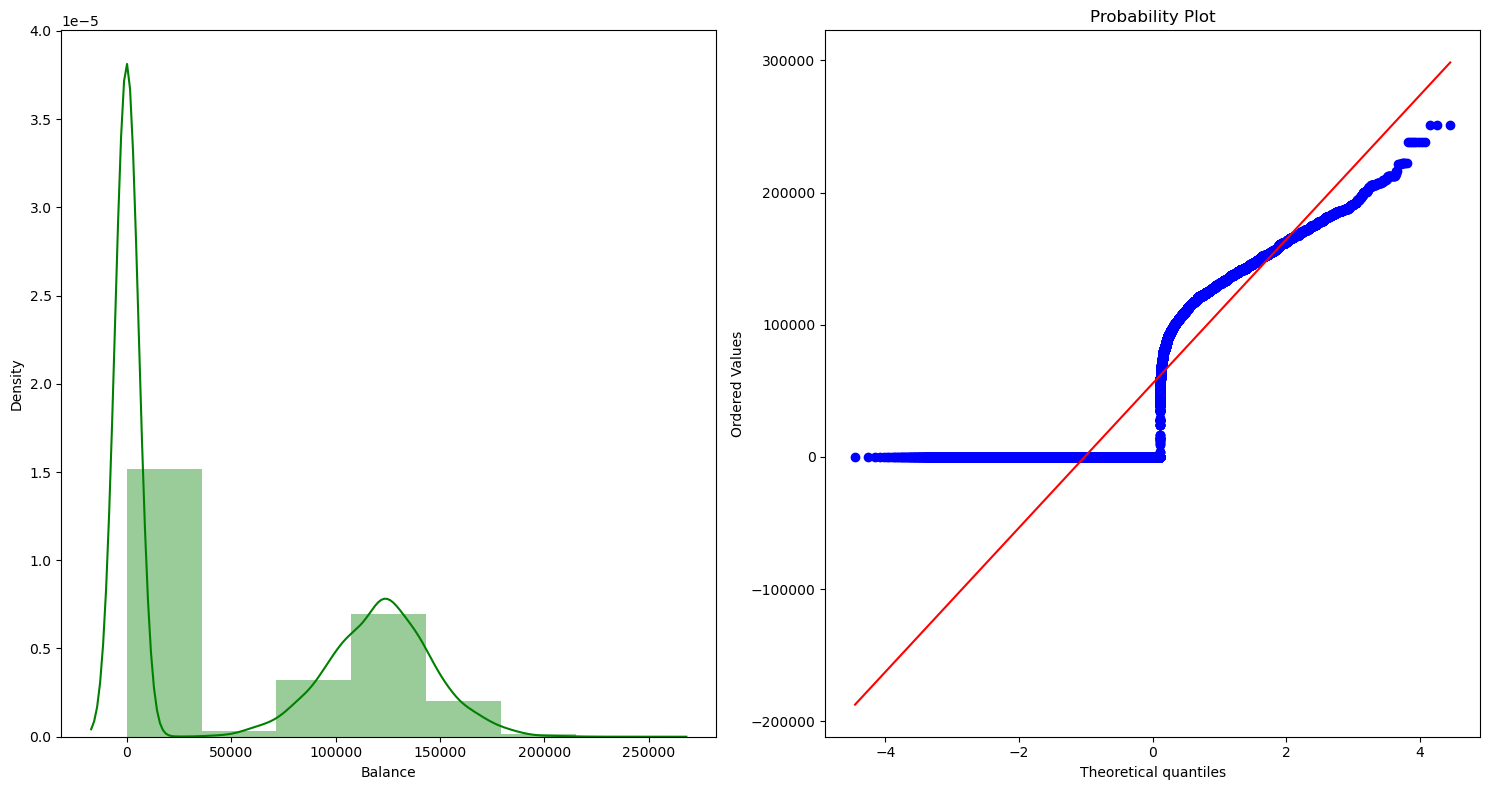

In [931]:
plot_dist('Balance')

In [932]:
#mifc(X_train,y_train)

In [933]:
X_train['Tenure'].describe()

count    132027.000000
mean          5.021821
std           2.808487
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: Tenure, dtype: float64

In [934]:
Age_ten=((X_train.Age*X_train.Tenure)).round(decimals=2)
X_train['Age_ten']=Age_ten
Age_ten=((X_test.Age*X_test.Tenure)).round(decimals=2)
X_test['Age_ten']=Age_ten

In [935]:
X_train

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Age_ten
149380,15780088,27.58,679,41.0,9,0.00,2,1.0,1.0,103560.98,0,0,1,369.0
164766,15679760,23.50,721,46.0,9,115764.32,2,1.0,0.0,102950.79,0,0,1,414.0
155569,15637678,15.42,551,35.0,5,0.00,1,1.0,0.0,155394.52,0,0,1,175.0
124304,15728693,9.08,743,31.0,3,57866.03,2,1.0,1.0,107428.42,0,1,0,93.0
108008,15613673,15.37,675,28.0,2,0.00,2,1.0,0.0,134110.93,0,0,1,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,15730673,12.99,668,45.0,6,104576.80,1,1.0,0.0,113081.42,1,0,1,270.0
103694,15731166,12.99,751,43.0,7,0.00,2,1.0,0.0,88866.39,0,0,1,301.0
131932,15573741,24.49,753,39.0,7,0.00,2,1.0,0.0,167973.63,0,0,0,273.0
146867,15754574,2.05,685,48.0,4,0.00,2,1.0,1.0,24998.75,0,0,0,192.0


In [936]:
X_train.describe()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Age_ten
count,1.320270e+05,132027.000000,132027.000000,132027.000000,132027.000000,132027.000000,132027.000000,132027.000000,132027.000000,132027.000000,132027.000000,132027.000000,132027.000000,132027.000000
mean,1.569183e+07,15.467428,656.783832,38.120996,5.021821,55609.625464,1.554682,0.753838,0.497300,112683.672952,0.210116,0.219160,0.564112,191.173913
std,7.137972e+04,7.731805,80.043164,8.869802,2.808487,62860.390849,0.547018,0.430776,0.499995,50275.570007,0.407392,0.413679,0.495875,118.235542
min,1.556570e+07,0.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,1.563290e+07,9.230000,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74835.650000,0.000000,0.000000,0.000000,93.000000
50%,1.569013e+07,15.890000,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,118024.100000,0.000000,0.000000,1.000000,182.000000
75%,1.575662e+07,21.860000,710.000000,42.000000,7.000000,120107.645000,2.000000,1.000000,1.000000,155616.750000,0.000000,0.000000,1.000000,272.000000
max,1.581569e+07,27.960000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,850.000000


In [937]:
LGBM(X_train,y_train,X_test,y_test)

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
0.8692701548156452
0.8931613105150645


In [938]:
def plot_corr(train_data):
    corr=train_data.corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr,cmap='crest',annot=True)

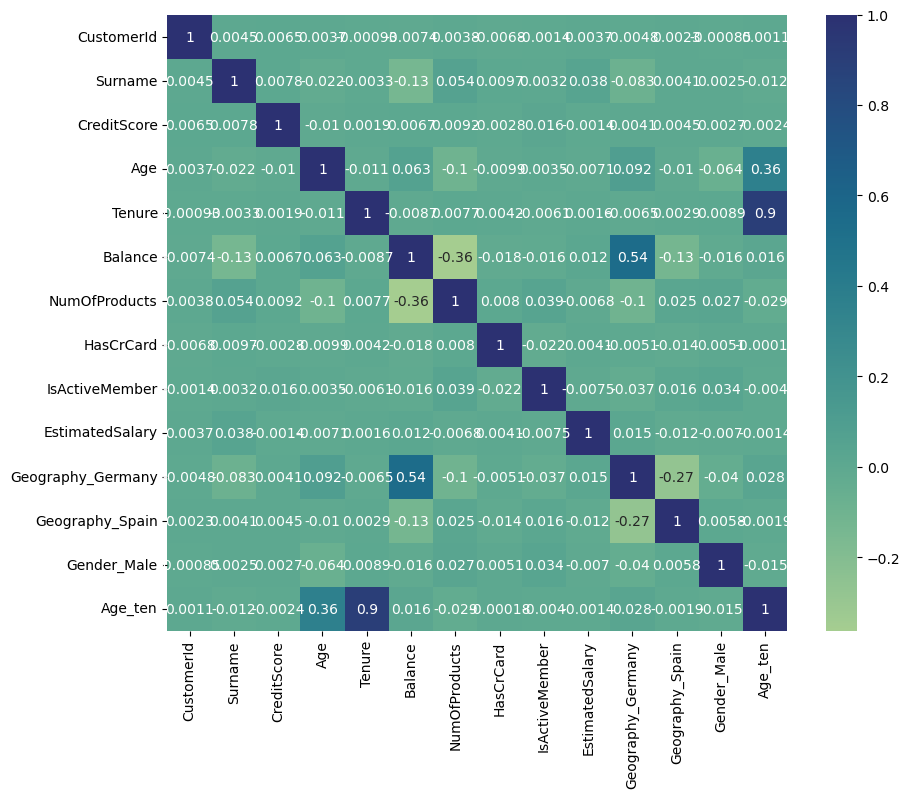

In [939]:
plot_corr(X_train)

In [940]:
X_train

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Age_ten
149380,15780088,27.58,679,41.0,9,0.00,2,1.0,1.0,103560.98,0,0,1,369.0
164766,15679760,23.50,721,46.0,9,115764.32,2,1.0,0.0,102950.79,0,0,1,414.0
155569,15637678,15.42,551,35.0,5,0.00,1,1.0,0.0,155394.52,0,0,1,175.0
124304,15728693,9.08,743,31.0,3,57866.03,2,1.0,1.0,107428.42,0,1,0,93.0
108008,15613673,15.37,675,28.0,2,0.00,2,1.0,0.0,134110.93,0,0,1,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,15730673,12.99,668,45.0,6,104576.80,1,1.0,0.0,113081.42,1,0,1,270.0
103694,15731166,12.99,751,43.0,7,0.00,2,1.0,0.0,88866.39,0,0,1,301.0
131932,15573741,24.49,753,39.0,7,0.00,2,1.0,0.0,167973.63,0,0,0,273.0
146867,15754574,2.05,685,48.0,4,0.00,2,1.0,1.0,24998.75,0,0,0,192.0


In [941]:
Is_Active_cred=X_train.IsActiveMember*X_train.HasCrCard
X_train['Is_Active_cred']=Is_Active_cred
Is_Active_cred=X_test.IsActiveMember*X_test.HasCrCard
X_test['Is_Active_cred']=Is_Active_cred

In [942]:
LGBM(X_train,y_train,X_test,y_test)

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1626
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
0.8692398582118944
0.8929981628293489


In [943]:
def min_max(train_data,col):
    min_value=train_data[col].min()
    max_value=train_data[col].max()
    train_data[col+'_scaled']=(train_data[col]-min_value)/(max_value-min_value)
    return train_data

In [944]:
X_train=min_max(X_train,'Balance')
X_test=min_max(X_test,'Balance')

X_train=min_max(X_train,'CreditScore')
X_test=min_max(X_test,'CreditScore')

X_train=min_max(X_train,'EstimatedSalary')
X_test=min_max(X_test,'EstimatedSalary')

In [945]:
LGBM(X_train,y_train,X_test,y_test)

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2390
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
0.8693610446268973
0.8930072029805346


In [946]:
X_train

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Age_ten,Is_Active_cred,Balance_scaled,CreditScore_scaled,EstimatedSalary_scaled
149380,15780088,27.58,679,41.0,9,0.00,2,1.0,1.0,103560.98,0,0,1,369.0,1.0,0.000000,0.658,0.517796
164766,15679760,23.50,721,46.0,9,115764.32,2,1.0,0.0,102950.79,0,0,1,414.0,0.0,0.461400,0.742,0.514745
155569,15637678,15.42,551,35.0,5,0.00,1,1.0,0.0,155394.52,0,0,1,175.0,0.0,0.000000,0.402,0.776989
124304,15728693,9.08,743,31.0,3,57866.03,2,1.0,1.0,107428.42,0,1,0,93.0,1.0,0.230636,0.786,0.537135
108008,15613673,15.37,675,28.0,2,0.00,2,1.0,0.0,134110.93,0,0,1,56.0,0.0,0.000000,0.650,0.670561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,15730673,12.99,668,45.0,6,104576.80,1,1.0,0.0,113081.42,1,0,1,270.0,0.0,0.416810,0.636,0.565403
103694,15731166,12.99,751,43.0,7,0.00,2,1.0,0.0,88866.39,0,0,1,301.0,0.0,0.000000,0.802,0.444316
131932,15573741,24.49,753,39.0,7,0.00,2,1.0,0.0,167973.63,0,0,0,273.0,0.0,0.000000,0.806,0.839890
146867,15754574,2.05,685,48.0,4,0.00,2,1.0,1.0,24998.75,0,0,0,192.0,1.0,0.000000,0.670,0.124948


In [947]:
X_test

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Age_ten,Is_Active_cred,Balance_scaled,CreditScore_scaled,EstimatedSalary_scaled
33042,15752375,5.29,798,31.0,8,102075.88,1,1.0,0.0,79577.48,0,0,0,248.0,0.0,0.406842,0.896,0.397867
36330,15742681,19.89,629,26.0,6,0.00,2,1.0,0.0,38190.78,0,0,1,156.0,0.0,0.000000,0.558,0.190913
59446,15730397,20.68,565,39.0,7,115163.32,3,1.0,0.0,69052.63,0,0,1,273.0,0.0,0.459004,0.430,0.345237
92278,15803365,5.57,653,55.0,2,70263.83,1,0.0,0.0,62347.71,0,1,1,110.0,0.0,0.280049,0.606,0.311710
146750,15735270,11.55,557,31.0,6,106596.29,1,1.0,0.0,91305.77,0,0,0,186.0,0.0,0.424859,0.414,0.456514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32661,15791958,19.23,719,27.0,2,0.00,2,1.0,1.0,74800.99,0,0,0,54.0,1.0,0.000000,0.738,0.373982
117592,15648067,27.29,773,32.0,4,0.00,1,1.0,0.0,93983.12,0,0,0,128.0,0.0,0.000000,0.846,0.469902
2194,15736069,11.75,767,35.0,7,132253.22,1,1.0,0.0,115566.57,1,0,0,245.0,0.0,0.527119,0.834,0.577830
141678,15740356,19.88,653,33.0,9,0.00,2,1.0,1.0,124489.88,0,0,0,297.0,1.0,0.000000,0.606,0.622451


In [948]:
lgbc=LGBMClassifier(boosting_type='gbdt',num_leaves=64,learning_rate=0.17,n_estimators=132,max_depth=4)
model=lgbc.fit(X_train,y_train)
pred=model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,pred))
print("Roc_Auc : ",roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2390
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [832]:
sur_geo_gen_sal=X_train.Surname+X_train.Geography_Spain+X_train.Geography_Germany+X_train.Gender_Male+X_train.EstimatedSalary
X_train['sur_geo_gen_sal']=sur_geo_gen_sal/100
sur_geo_gen_sal=X_test.Surname+X_test.Geography_Spain+X_test.Geography_Germany+X_test.Gender_Male+X_test.EstimatedSalary
X_test['sur_geo_gen_sal']=sur_geo_gen_sal/100

In [833]:
X_train

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Age_ten,Is_Active_cred,sur_geo_gen_sal
149380,15780088,27.58,679,41.0,9,0.00,2,1.0,1.0,103560.98,0,0,1,369.0,1.0,1035.8956
164766,15679760,23.50,721,46.0,9,115764.32,2,1.0,0.0,102950.79,0,0,1,414.0,0.0,1029.7529
155569,15637678,15.42,551,35.0,5,0.00,1,1.0,0.0,155394.52,0,0,1,175.0,0.0,1554.1094
124304,15728693,9.08,743,31.0,3,57866.03,2,1.0,1.0,107428.42,0,1,0,93.0,1.0,1074.3850
108008,15613673,15.37,675,28.0,2,0.00,2,1.0,0.0,134110.93,0,0,1,56.0,0.0,1341.2730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,15730673,12.99,668,45.0,6,104576.80,1,1.0,0.0,113081.42,1,0,1,270.0,0.0,1130.9641
103694,15731166,12.99,751,43.0,7,0.00,2,1.0,0.0,88866.39,0,0,1,301.0,0.0,888.8038
131932,15573741,24.49,753,39.0,7,0.00,2,1.0,0.0,167973.63,0,0,0,273.0,0.0,1679.9812
146867,15754574,2.05,685,48.0,4,0.00,2,1.0,1.0,24998.75,0,0,0,192.0,1.0,250.0080


In [834]:
lgbc=LGBMClassifier(boosting_type='gbdt',num_leaves=64,learning_rate=0.17,n_estimators=132,max_depth=4)
model=lgbc.fit(X_train,y_train)
pred=model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,pred))
print("Roc_Auc : ",roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1881
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [835]:
#mifc(X_train,y_train)

In [836]:
X_train['active_age']=(X_train.IsActiveMember*X_train.Age)/10
X_test['active_age']=(X_test.IsActiveMember*X_test.Age)/10

In [837]:
X_train

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Age_ten,Is_Active_cred,sur_geo_gen_sal,active_age
149380,15780088,27.58,679,41.0,9,0.00,2,1.0,1.0,103560.98,0,0,1,369.0,1.0,1035.8956,4.1
164766,15679760,23.50,721,46.0,9,115764.32,2,1.0,0.0,102950.79,0,0,1,414.0,0.0,1029.7529,0.0
155569,15637678,15.42,551,35.0,5,0.00,1,1.0,0.0,155394.52,0,0,1,175.0,0.0,1554.1094,0.0
124304,15728693,9.08,743,31.0,3,57866.03,2,1.0,1.0,107428.42,0,1,0,93.0,1.0,1074.3850,3.1
108008,15613673,15.37,675,28.0,2,0.00,2,1.0,0.0,134110.93,0,0,1,56.0,0.0,1341.2730,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,15730673,12.99,668,45.0,6,104576.80,1,1.0,0.0,113081.42,1,0,1,270.0,0.0,1130.9641,0.0
103694,15731166,12.99,751,43.0,7,0.00,2,1.0,0.0,88866.39,0,0,1,301.0,0.0,888.8038,0.0
131932,15573741,24.49,753,39.0,7,0.00,2,1.0,0.0,167973.63,0,0,0,273.0,0.0,1679.9812,0.0
146867,15754574,2.05,685,48.0,4,0.00,2,1.0,1.0,24998.75,0,0,0,192.0,1.0,250.0080,4.8


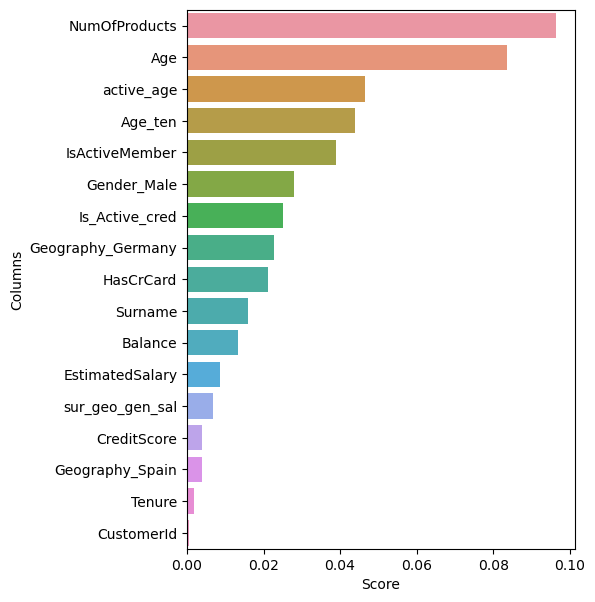

In [838]:
mifc(X_train,y_train)

In [839]:
LGBM(X_train,y_train,X_test,y_test)

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1950
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
0.8693004514193959
0.8928601570293025


In [840]:
lgbc=LGBMClassifier(boosting_type='gbdt',num_leaves=32,learning_rate=0.1711,n_estimators=132,max_depth=4,reg_alpha=0.0) 
model=lgbc.fit(X_train,y_train)
pred=model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,pred))
print("Roc_Auc : ",roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1950
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [841]:
X_train['IsSenior'] = (X_train['Age'].apply(lambda x: 1 if x >= 60 else 0))
X_test['IsSenior'] = (X_test['Age'].apply(lambda x: 1 if x >= 60 else 0))

In [842]:
X_train.head(50)

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Age_ten,Is_Active_cred,sur_geo_gen_sal,active_age,IsSenior
149380,15780088,27.58,679,41.0,9,0.00,2,1.0,1.0,103560.98,0,0,1,369.0,1.0,1035.8956,4.1,0
164766,15679760,23.50,721,46.0,9,115764.32,2,1.0,0.0,102950.79,0,0,1,414.0,0.0,1029.7529,0.0,0
155569,15637678,15.42,551,35.0,5,0.00,1,1.0,0.0,155394.52,0,0,1,175.0,0.0,1554.1094,0.0,0
124304,15728693,9.08,743,31.0,3,57866.03,2,1.0,1.0,107428.42,0,1,0,93.0,1.0,1074.3850,3.1,0
108008,15613673,15.37,675,28.0,2,0.00,2,1.0,0.0,134110.93,0,0,1,56.0,0.0,1341.2730,0.0,0
56281,15673984,6.39,536,30.0,8,0.00,1,1.0,0.0,171840.24,0,0,0,240.0,0.0,1718.4663,0.0,0
46050,15679963,20.68,624,32.0,5,0.00,2,1.0,1.0,100995.72,0,0,0,160.0,1.0,1010.1640,3.2,0
89344,15741652,27.57,716,35.0,5,0.00,2,1.0,1.0,187816.59,0,0,0,175.0,1.0,1878.4416,3.5,0
62099,15681402,14.02,588,38.0,7,0.00,1,1.0,0.0,55724.24,0,1,0,266.0,0.0,557.3926,0.0,0
129621,15661670,26.72,645,42.0,7,141665.63,2,1.0,0.0,97939.40,1,0,0,294.0,0.0,979.6712,0.0,0


In [843]:
lgbc=LGBMClassifier(boosting_type='gbdt',num_leaves=32,learning_rate=0.1711,n_estimators=132,max_depth=4,reg_alpha=0.0) 
model=lgbc.fit(X_train,y_train)
pred=model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,pred))
print("Roc_Auc : ",roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1952
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

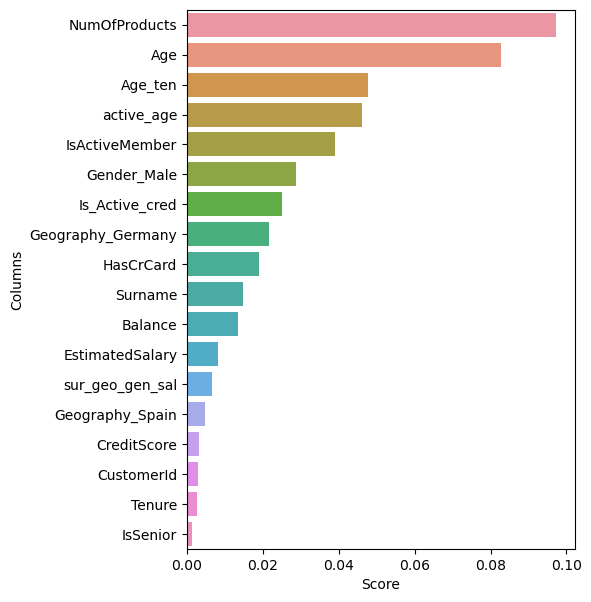

In [844]:
mifc(X_train,y_train)